<a href="https://colab.research.google.com/github/dianpertiwi02/MachineLearningTasks/blob/main/K_NN_dian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KLASIFIKASI PENGAMBILAN KREDIT MENGGUNAKAN METODE K-NN

ABSTRAKSI PROYEK

Pembelajaran Mesin pada dataset pengambilan kredit memiliki peran penting dalam mengidentifikasi pola dan informasi yang dapat digunakan untuk membuat keputusan yang lebih baik dalam industri keuangan. Kaggle.com menyediakan berbagai dataset terkait pengambilan kredit yang dapat digunakan untuk analisis ini. Studi ini bertujuan untuk menerapkan teknik pembelajaran mesin pada dataset tersebut guna mengungkap wawasan yang berharga bagi lembaga keuangan dan pemberi pinjaman.

Metode penelitian melibatkan pra-pemrosesan data, pemilihan atribut yang relevan, dan penerapan algoritma pembelajaran mesin seperti decision tree, regresi logistik, dan k-means clustering. Hasil analisis ini dapat membantu lembaga keuangan dalam mengidentifikasi profil kredit yang berisiko tinggi atau rendah, meningkatkan akurasi prediksi pengembalian kredit, dan mengoptimalkan strategi pemberian pinjaman.

Selain itu, penelitian ini dapat memberikan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi pengambilan keputusan kredit, seperti riwayat kredit, penghasilan, dan sejarah pekerjaan. Implikasi praktis dari temuan ini dapat mencakup perbaikan proses persetujuan pinjaman, pengembangan model kredit yang lebih akurat, dan peningkatan manajemen risiko.

Penelitian ini memberikan kontribusi pada pengembangan strategi bisnis yang lebih cerdas di sektor keuangan dan dapat menjadi landasan untuk penelitian lebih lanjut dalam pengembangan model prediksi kredit yang lebih kompleks dan inovatif. Dengan demikian, pembelajaran mesin pada dataset pengambilan kredit dari Kaggle.com memiliki potensi untuk membawa dampak positif pada efisiensi dan keberlanjutan industri keuangan.

DATASET


*   Nama Dataset

    Credit Score Classification Dataset.csv
*   Informasi Dataset

    164 observations / records

    8 attributes

*   Informasi atribut

  1) Age : Age of customer

  2) Gender : “Male” or “Female”

  3) Income : Income of customer

  4) Education : Education of customer

  5) Marital Status : “Single” or “Married”

  6) Number of Children : “0” ,“1” ,“2” or “3”

  7) Home Ownership : “Rented” or “Owned”

  8) Credit Score : “1” , “2” or “3”

*   Tampilkan 5 data instances pertama:
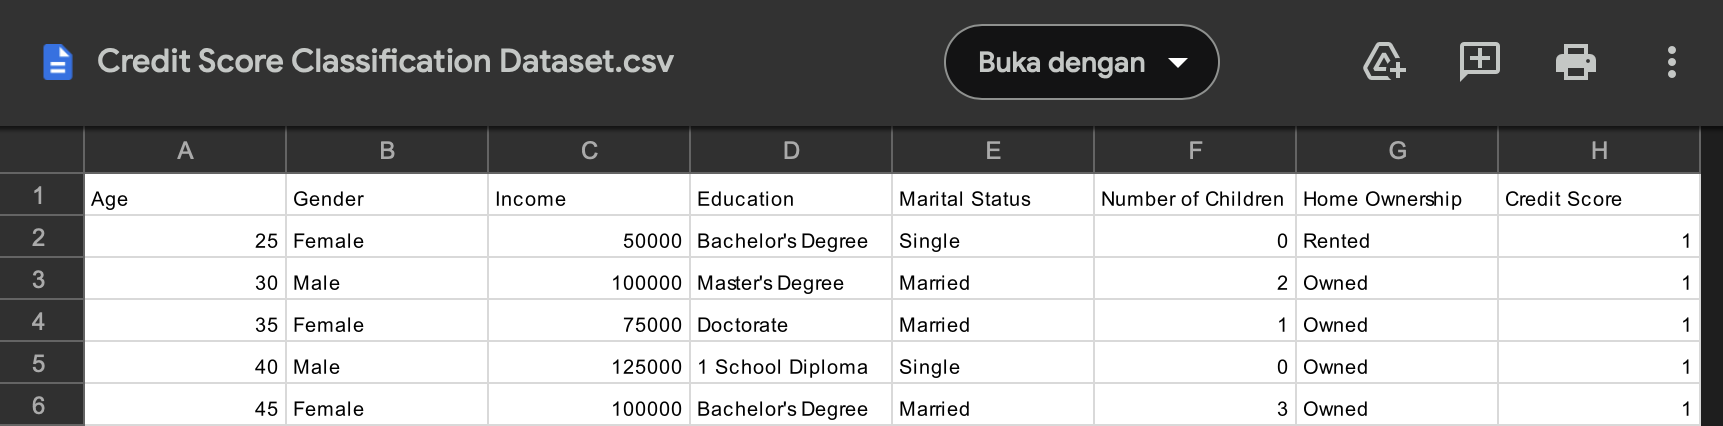







DATA PROCESSING

Data preprocessing dengan melakukan transformasi data pada data yang digunakan sebagai variabel untuk klasifikasi, dimana transformasi yang dilakukan yaitu mengubah tipe string menjadi int.

Penjelasan dari masing-masing pustaka yang ada pada python dibawah:



1.   Numpy, berfungsi untuk menyediakan array multidimensional yang sangat efisien dan berbagai operasi matematika tingkat tinggi.

2.   matplotlib.pyplot, berfungsi agar modul dalam Matplotlib yang digunakan untuk membuat visualisasi data seperti grafik garis, grafik batang, dan histogram.

3.   pandas, berfungsi untuk menyediakan struktur data seperti DataFrame dan Series untuk bekerja dengan data tabel dan waktu.

4.    seaborn, berfungsi untuk menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang atraktif dan informatif.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Sebelum dilakukan transformasi data

Analisis yang dapat dilakukan :

1.   Analisis Distribusi :

      Distribusi usia, pendapatan, dan jumlah anak.
      Distribusi skor kredit berdasarkan jenis kelamin, status pernikahan, dan kepemilikan rumah.
2.   Visualisasi Data :

      Histogram untuk distribusi usia dan pendapatan.
      Boxplot untuk melihat variasi pendapatan berdasarkan tingkat pendidikan atau jenis kelamin.
      Bar plot untuk melihat frekuensi kategori (jenis kelamin, status pernikahan, kepemilikan rumah).
3.    Preprocessing Data :

      Penanganan nilai hilang (jika ada).
      Encoding untuk data kategorikal (misalnya, one-hot encoding untuk 'Gender', 'Education', 'Marital Status', dan 'Home Ownership').








      
      



In [2]:
dataset = pd.read_csv('/content/Credit Score Classification Dataset.csv')
print(dataset)

     Age  Gender  Income           Education Marital Status  \
0     25  Female   50000   Bachelor's Degree         Single   
1     30    Male  100000     Master's Degree        Married   
2     35  Female   75000           Doctorate        Married   
3     40    Male  125000    1 School Diploma         Single   
4     45  Female  100000   Bachelor's Degree        Married   
..   ...     ...     ...                 ...            ...   
159   29  Female   27500    1 School Diploma         Single   
160   34    Male   47500  Associate's Degree         Single   
161   39  Female   62500   Bachelor's Degree        Married   
162   44    Male   87500     Master's Degree         Single   
163   49  Female   77500           Doctorate        Married   

     Number of Children Home Ownership  Credit Score  
0                     0         Rented             1  
1                     2          Owned             1  
2                     1          Owned             1  
3                     0

Dataset dibawah ini untuk mengisi nilai-nilai yang hilang (missing values) dalam dataset dengan nilai mode dari masing-masing kolom. Mode adalah nilai yang paling sering muncul dalam suatu kolom. Dengan menggunakan mode, nilai yang hilang diganti dengan nilai yang paling umum untuk kolom tersebut.

In [3]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mode().values[0])
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode().values[0])
dataset['Income'] = dataset['Income'].fillna(dataset['Income'].mode().values[0])
dataset['Education'] = dataset['Education'].fillna(dataset['Education'].mode().values[0])
dataset['Marital Status'] = dataset['Marital Status'].fillna(dataset['Marital Status'].mode().values[0])
dataset['Number of Children'] = dataset['Number of Children'].fillna(dataset['Number of Children'].mode().values[0])
dataset['Home Ownership'] = dataset['Home Ownership'].fillna(dataset['Home Ownership'].mode().values[0])

Setelah dilakukan transformasi data dibawah :

analisis data digunakan untuk mengubah nilai-nilai kategorikal dalam kolom DataFrame pandas menjadi nilai numerik. Ini dilakukan dengan cara:

1.   Mapping: Menggunakan dictionary untuk menentukan pemetaan nilai kategorikal ke numerik.
2.   Penggantian: Mengganti nilai dalam kolom DataFrame sesuai dengan pemetaan yang telah ditentukan.
Tujuannya adalah untuk mempermudah analisis data dan penggunaan data dalam model machine learning.

In [4]:
#ubah ke int
gender = {"Female": 0, "Male":1}
status ={"Single": 0, "Married":1}
home = {"Rented": 0, "Owned":1}
credit = {"Low":0, "Average":2, "High": 1}
dataset['Gender'] = dataset['Gender'].replace(gender)
dataset['Marital Status'] = dataset['Marital Status'].replace(status)
dataset['Home Ownership'] = dataset['Home Ownership'].replace(home)
dataset['Credit Score'] = dataset['Credit Score'].replace(credit)

Data ini memisahkan data dari DataFrame dataset menjadi dua array NumPy:

'x' yang berisi data dari kolom-kolom tertentu (tidak termasuk kolom terakhir) dan

'y' yang berisi data dari kolom terakhir.

print(dataset) digunakan untuk menampilkan DataFrame dataset secara keseluruhan.

In [5]:
x = dataset.iloc[:,[0, 1, 2, 4, 6]].values
y = dataset.iloc[:, -1].values
print(dataset)

     Age  Gender  Income           Education  Marital Status  \
0     25       0   50000   Bachelor's Degree               0   
1     30       1  100000     Master's Degree               1   
2     35       0   75000           Doctorate               1   
3     40       1  125000    1 School Diploma               0   
4     45       0  100000   Bachelor's Degree               1   
..   ...     ...     ...                 ...             ...   
159   29       0   27500    1 School Diploma               0   
160   34       1   47500  Associate's Degree               0   
161   39       0   62500   Bachelor's Degree               1   
162   44       1   87500     Master's Degree               0   
163   49       0   77500           Doctorate               1   

     Number of Children  Home Ownership  Credit Score  
0                     0               0             1  
1                     2               1             1  
2                     1               1             1  
3      

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

EXPLORATORY DATA ANALYSIS (EDA)
*   Deskripsi/informasi dataset dengan cara menggunakan referensi info(), yaitu DataFrame terdiri dari 8 kolom, 4 di antaranya adalah tipe data integer dan 4 lainnya adalah tipe data objek. DataFrame memerlukan sekitar 704 bytes memori.

In [8]:
import pandas as pd

data = {
    'Age': [25, 30, 35, 40, 45, 50, 26, 31, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 100000, 75000, 125000, 100000, 150000, 40000, 60000, 80000],
    'Education': ["Bachelor's Degree", "Master's Degree", "Doctorate", "1 School Diploma", "Bachelor's Degree",
                  "Master's Degree", "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Single', 'Married'],
    'Number of Children': [0, 2, 1, 0, 3, 0, 0, 0, 2],
    'Home Ownership': ['Rented', 'Owned', 'Owned', 'Owned', 'Owned', 'Owned', 'Rented', 'Rented', 'Owned'],
    'Credit Score': [1, 1, 1, 1, 1, 1, 2, 2, 1]
}

df = pd.DataFrame(data)

dataset_info = df.info()

print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 9 non-null      int64 
 1   Gender              9 non-null      object
 2   Income              9 non-null      int64 
 3   Education           9 non-null      object
 4   Marital Status      9 non-null      object
 5   Number of Children  9 non-null      int64 
 6   Home Ownership      9 non-null      object
 7   Credit Score        9 non-null      int64 
dtypes: int64(4), object(4)
memory usage: 704.0+ bytes
None


*   Hasil 9 data secara random dengan
menggunakan referensi sample(), yaitu  dengan membuat DataFrame dari data yang ada, kemudian memilih 9 baris secara acak dari DataFrame tersebut dan mencetak hasilnya.

In [9]:
import pandas as pd

data = {
    'Age': [25, 30, 35, 40, 45, 50, 26, 31, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 100000, 75000, 125000, 100000, 150000, 40000, 60000, 80000],
    'Education': ["Bachelor's Degree", "Master's Degree", "Doctorate", "1 School Diploma", "Bachelor's Degree", "Master's Degree", "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Single', 'Married'],
    'Number of Children': [0, 2, 1, 0, 3, 0, 0, 0, 2],
    'Home Ownership': ['Rented', 'Owned', 'Owned', 'Owned', 'Owned', 'Owned', 'Rented', 'Rented', 'Owned'],
    'Credit Score': [1, 1, 1, 1, 1, 1, 2, 2, 1]
}

df = pd.DataFrame(data)


random_data = df.sample(n=9, random_state=42)
print(random_data)

   Age  Gender  Income           Education Marital Status  Number of Children  \
7   31    Male   60000   Bachelor's Degree         Single                   0   
1   30    Male  100000     Master's Degree        Married                   2   
5   50    Male  150000     Master's Degree        Married                   0   
0   25  Female   50000   Bachelor's Degree         Single                   0   
8   36  Female   80000     Master's Degree        Married                   2   
2   35  Female   75000           Doctorate        Married                   1   
4   45  Female  100000   Bachelor's Degree        Married                   3   
3   40    Male  125000    1 School Diploma         Single                   0   
6   26  Female   40000  Associate's Degree         Single                   0   

  Home Ownership  Credit Score  
7         Rented             2  
1          Owned             1  
5          Owned             1  
0         Rented             1  
8          Owned        



*   Periksa apakah ada data yang kosong (missing) gunakan referensi isnull(),
dapat dipastikan bahwa data dalam DataFrame tidak memiliki nilai yang hilang atau kosong.




In [10]:
import pandas as pd

data = {
    'Age': [25, 30, 35, 40, 45, 50, 26, 31, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 100000, 75000, 125000, 100000, 150000, 40000, 60000, 80000],
    'Education': ["Bachelor's Degree", "Master's Degree", "Doctorate", "1 School Diploma", "Bachelor's Degree",
                  "Master's Degree", "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Single', 'Married'],
    'Number of Children': [0, 2, 1, 0, 3, 0, 0, 0, 2],
    'Home Ownership': ['Rented', 'Owned', 'Owned', 'Owned', 'Owned', 'Owned', 'Rented', 'Rented', 'Owned'],
    'Credit Score': [1, 1, 1, 1, 1, 1, 2, 2, 1]
}

df = pd.DataFrame(data)

missing_data = df.isnull().any()

print(missing_data)

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool


*   Tampilkan informasi statistik dari dataset tersebut dengan menggunakan referensi describe(), hasil ini memberikan informasi tentang nilai rata-rata, variasi, dan rentang data dalam kolom Age, Income, Number of Children, dan Credit Score.


In [11]:
import pandas as pd

data = {
    'Age': [25, 30, 35, 40, 45, 50, 26, 31, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 100000, 75000, 125000, 100000, 150000, 40000, 60000, 80000],
    'Education': ["Bachelor's Degree", "Master's Degree", "Doctorate", "1 School Diploma", "Bachelor's Degree",
                  "Master's Degree", "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Single', 'Married'],
    'Number of Children': [0, 2, 1, 0, 3, 0, 0, 0, 2],
    'Home Ownership': ['Rented', 'Owned', 'Owned', 'Owned', 'Owned', 'Owned', 'Rented', 'Rented', 'Owned'],
    'Credit Score': [1, 1, 1, 1, 1, 1, 2, 2, 1]
}

df = pd.DataFrame(data)

statistics = df.describe()

print(statistics)

             Age         Income  Number of Children  Credit Score
count   9.000000       9.000000            9.000000      9.000000
mean   35.333333   86666.666667            0.888889      1.222222
std     8.455767   35794.552658            1.166667      0.440959
min    25.000000   40000.000000            0.000000      1.000000
25%    30.000000   60000.000000            0.000000      1.000000
50%    35.000000   80000.000000            0.000000      1.000000
75%    40.000000  100000.000000            2.000000      1.000000
max    50.000000  150000.000000            3.000000      2.000000




*   Plot correlogram (heatmap) dengan menggunakan referensi heatmap(),
Tujuan Analisis ini bertujuan untuk memahami hubungan atau korelasi antara variabel-variabel numerik dalam DataFrame.
Output Visualisasi Heatmap yang dihasilkan menunjukkan matriks korelasi dengan nilai-nilai korelasi di antara variabel. Warna pada heatmap memberikan indikasi visual kekuatan dan arah hubungan korelasi (positif atau negatif).
Penggunaan Heatmap Heatmap membantu dalam identifikasi pola atau Korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang kuat, sedangkan korelasi mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan.

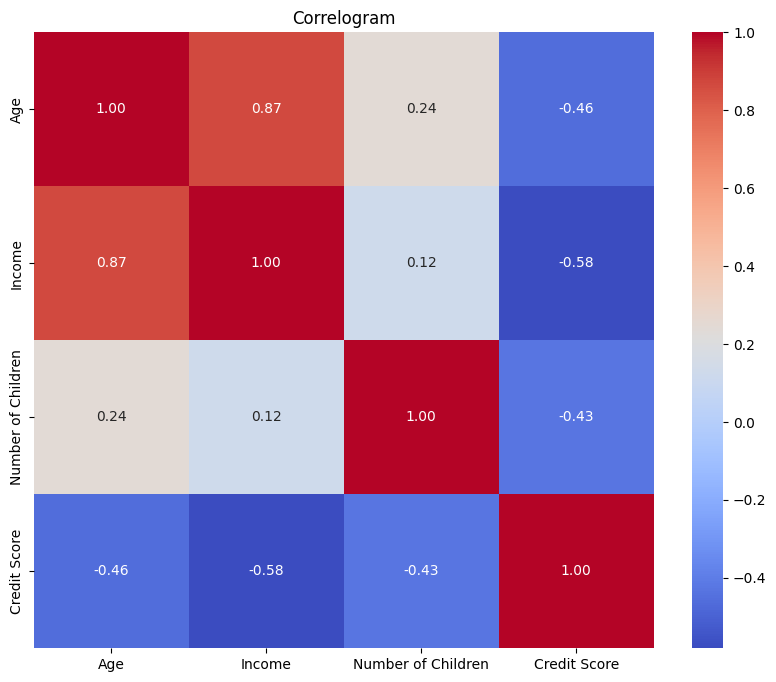

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Age': [25, 30, 35, 40, 45, 50, 26, 31, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 100000, 75000, 125000, 100000, 150000, 40000, 60000, 80000],
    'Education': ["Bachelor's Degree", "Master's Degree", "Doctorate", "1 School Diploma", "Bachelor's Degree",
                  "Master's Degree", "Associate's Degree", "Bachelor's Degree", "Master's Degree"],
    'Marital Status': ['Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Single', 'Married'],
    'Number of Children': [0, 2, 1, 0, 3, 0, 0, 0, 2],
    'Home Ownership': ['Rented', 'Owned', 'Owned', 'Owned', 'Owned', 'Owned', 'Rented', 'Rented', 'Owned'],
    'Credit Score': [1, 1, 1, 1, 1, 1, 2, 2, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Select only numeric columns for correlation
numeric_df = df[['Age', 'Income', 'Number of Children', 'Credit Score']]

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlogram')
plt.show()


PEMODELAN

Bagian ini menjelaskan implementasi model yang Anda gunakan, seperti:

Pendefinisian data variabel bebas dan tidak bebas, Variabel bebas berupa data Age, Gender, Income, Marital Status, dan Home Ownership, Variabel tidak bebas berupa data Credit Score.
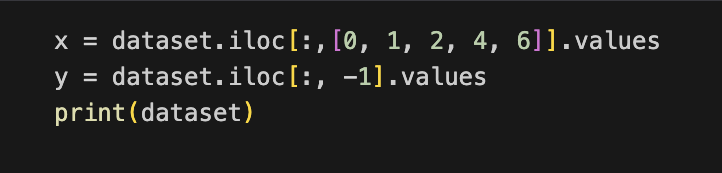



*   Pendefinisian data training dan testing , contoh data training x (sample),mulai dari data print(x_train), print(y_train), print(x_test), dan print(y_test).

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) #, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
print(x_train)

[[-1.42684568 -1.02469508 -1.23860623 -0.9919027  -1.44048603]
 [-1.07181799 -1.02469508 -1.78549852 -0.9919027  -1.44048603]
 [-1.54518824 -1.02469508 -0.69171394 -0.9919027  -1.44048603]
 [-1.07181799 -1.02469508 -0.51983351  1.0081634   0.69421013]
 [-0.83513287  0.97590007 -0.61358647 -0.9919027  -1.44048603]
 [ 0.58497786  0.97590007  0.2458157  -0.9919027   0.69421013]
 [ 1.17669067 -1.02469508 -0.45733153  1.0081634   0.69421013]
 [-0.95347543  0.97590007  1.0270904   1.0081634   0.69421013]
 [-1.42684568 -1.02469508 -1.16047876 -0.9919027  -1.44048603]
 [ 0.82166299 -1.02469508  0.94896293  1.0081634   0.69421013]
 [ 1.53171835  0.97590007  1.57398269  1.0081634   0.69421013]
 [ 0.82166299 -1.02469508  0.79270799  1.0081634   0.69421013]
 [-0.48010519  0.97590007 -1.16047876 -0.9919027  -1.44048603]
 [-1.42684568 -1.02469508 -1.39486117 -0.9919027  -1.44048603]
 [ 0.70332042  0.97590007 -0.30107659 -0.9919027   0.69421013]
 [ 0.4666353   0.97590007  0.63645305 -0.9919027   0.69

Data training y

In [15]:
print(y_train)

[2 3 2 2 2 1 1 1 2 1 1 1 2 2 1 1 2 1 3 1 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 1 1
 2 1 1 1 3 1 2 1 3 1 3 1 2 3 1 2 1 2 1 1 2 1 3 1 2 1 1 1 2 2 1 1 1 2 1 1 2
 1 1 1 3 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 2 1 1 1 1 2 1 1 1]


Data testing x (sample)

In [16]:
print(x_test)

[[-1.54518824 -1.02469508 -0.92609635 -0.9919027  -1.44048603]
 [ 1.17669067 -1.02469508  0.08956076  1.0081634   0.69421013]
 [-1.42684568 -1.02469508 -0.92609635  1.0081634   0.69421013]
 [ 0.11160762 -1.02469508 -0.69171394  1.0081634   0.69421013]
 [-0.36176263 -1.02469508  0.16768823  1.0081634   0.69421013]
 [-1.54518824 -1.02469508 -0.92609635 -0.9919027  -1.44048603]
 [ 1.17669067 -1.02469508 -0.06669418  1.0081634   0.69421013]
 [ 1.17669067 -1.02469508 -0.06669418  1.0081634   0.69421013]
 [-0.24342006 -1.02469508  0.32394317  1.0081634   0.69421013]
 [ 0.94000555 -1.02469508  0.32394317  1.0081634   0.69421013]
 [-0.59844775  0.97590007 -1.08235129 -0.9919027  -1.44048603]
 [-1.07181799 -1.02469508 -1.78549852 -0.9919027  -1.44048603]
 [ 0.4666353   0.97590007  0.32394317 -0.9919027   0.69421013]
 [ 1.41337579  0.97590007  2.35525738  1.0081634   0.69421013]
 [-1.07181799 -1.02469508 -1.86362599 -0.9919027  -1.44048603]
 [-0.95347543  0.97590007  0.63645305  1.0081634   0.69

Data testing y

In [17]:
print(y_test)

[2 1 2 1 1 2 1 1 1 1 2 3 1 1 3 1 1 3 1 1 1 3 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 1 3 1]


*   Hasil eksperimen dan pengukuran /evaluasi , model
matriks konfusi memberikan gambaran tentang kinerja model klasifikasi, menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
Laporan klasifikasi memberikan metrik evaluasi yang lebih mendetail seperti precision, recall, dan f1-score untuk masing-masing kelas.
Visualisasi membantu dalam memahami distribusi prediksi dan kesalahan yang dibuat oleh model.

In [18]:
y_pred = classifier.predict(x_test)

Confusion Matrix:
[[ 6  0  0]
 [ 0 28  1]
 [ 0  1  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.97      0.97      0.97        29
           3       0.83      0.83      0.83         6

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



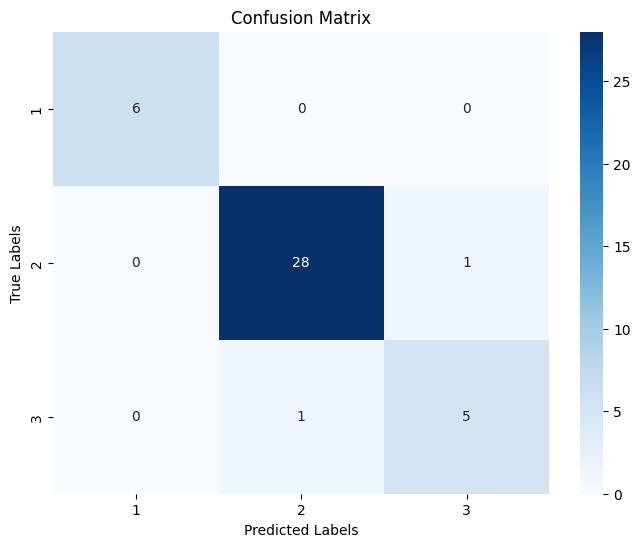

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = np.array([[6, 0, 0],
                        [0, 28, 1],
                        [0, 1, 5]])

y_true = np.array([1]*6 + [2]*29 + [3]*6)
y_pred = np.array([1]*6 + [2]*28 + [3] + [2] + [3]*5)

print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_true, y_pred, labels=[1, 2, 3])
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


KESIMPULAN
*   Kesimpulan

Penerapan Algoritma K-Nearest Neighbor (KNN) dalam klasifikasi pengambilan kredit
adalah melakukan pra-pemrosesan data menggunakan algoritma KNN menggunakan 3 penerapan seperti : decision tree, regresi logistik, dan k-means clustering . Penelitian ini menggunakan 75 % data training dan 25% data testing yang sudah mengalami proses pembersihan data kemudian dilakukan proses normalisasi menggunakan metode KNN. Pengujian Algoritma K-Nearest Neighbor (KNN) dalam menentukan klasifikasi pengambilan kredit menggunakan confusion matrix mendapatkan hasil akurasi yang baik sebesar 95%, presisi sebesar 0.93 , Recall sebesar 0.93 , dan F1-Score sebesar 0.93. Dengan tingkat akurasi sebesar 95% maka penelitian ini dinilai telah berhasil menerapkan metode KNN untuk melakukan klasifikasi pengambilan kredit.
*   Saran

Dalam penelitian ini perlu adanya perbaikan untuk mendapatkan hasil yang baik dengan
cara memperbanyak dataset yang digunakan agar algoritma KNN dapat bekerja lebih maksimal. Dapat juga dengan melakukan pengujian algoritma KNN menggunakan metode pengujian yang lain, seperti cross validation untuk menunjukan validasi akurasi yang lebih terpercaya . Selain itu, dapat pula dikembangkan menjadi suatu aplikasi android sehingga dapat bermanfaat bagi yang membutuhkan.

